In [42]:
import pandas as pd
import simpy
import statistics as st
import matplotlib.pyplot as plt
import math as m

In [43]:
base_dados = pd.read_csv("DoaçãoRimC.csv", sep=",")

## Mantendo apenas os dados que serão utilizados 

In [44]:
remover = base_dados.drop(columns=["age_cat","time_on_Dialysis","date_acutal","Time_death","Transplant_Y_N","X36MthsTx","Time_Tx","event","razon_removed"])

remover.head()

,Paciente Id,Data de chegada na fila,date,age_at_list_registration,Prioridade,number_prior_transplant,patient_still_on_list,death,Sem transplante,Transplant,number_removed_list,removed_list,time,saida da fila sem transplante
0,1.0,1.0,03/01/2000,52,1.0,0,Não,Não,1.0,Sim,0.0,Não,1479,NaN
1,2.0,2.0,04/01/2000,51,0.0,1,Não,Não,0.0,Não,1.0,Sim,1833,NaN
2,3.0,2.0,04/01/2000,44,1.0,0,Não,Sim,0.0,Óbito Lista,0.0,Não,775,NaN
3,4.0,3.0,05/01/2000,53,1.0,0,Não,Sim,0.0,Óbito Lista,0.0,Não,1888,NaN
4,5.0,4.0,06/01/2000,61,1.0,0,Não,Sim,0.0,Óbito Lista,0.0,Não,1226,NaN


In [ ]:
dataChegada = base_dados['Data de chegada na fila']
idPaciente = base_dados['Paciente Id']
tempo = base_dados['time']
prioridade = base_dados['Prioridade']
transplanteOcorreu = base_dados['Sem transplante']
def passandoLista(coluna):
    lista = []

    for item in coluna:
        lista.append(int(item))
        
    return lista

dataChegada100 = dataChegada[:100]
idPaciente100 = idPaciente[:100]
tempo100 = tempo[:100]
prioridade100 = prioridade[:100]
transplanteOcorreu100 = transplanteOcorreu[:100]
passandoLista(dataChegada100)

# Ordenando base de dados em linha do tempo crescente com recorte temporal para 2016

In [46]:
base_dados['date'] = pd.to_datetime(base_dados['date'], dayfirst=True)
base_dados = base_dados.sort_values('date')
base_dados['final_date'] = base_dados['date'] + pd.to_timedelta(base_dados['time'], unit='D')

number_of_transplants_per_year = []

currentYear = 2000
for i in range(17):
    dados_filtrados = base_dados.loc[(base_dados['final_date'].dt.year == currentYear) & (base_dados['Transplant'] == 'Sim')]
    try:
        contagem_sim_condicional = dados_filtrados['Transplant'].value_counts()['Sim']
        number_of_transplants_per_year.append(contagem_sim_condicional)
        print("Número de transplantes ocorridos em ", currentYear, ": ", contagem_sim_condicional)
    except:
        contagem_sim_condicional = 0
        print("Não houveram transplantes no ano", currentYear)
    currentYear = currentYear + 1

dados_filtrados = base_dados[base_dados['date'].dt.year == 2016]
display(dados_filtrados)

print("Array total com numero de transplants por ano:", number_of_transplants_per_year)


Não houveram transplantes no ano 2000
Número de transplantes ocorridos em  2001 :  30
Número de transplantes ocorridos em  2002 :  99
Número de transplantes ocorridos em  2003 :  227
Número de transplantes ocorridos em  2004 :  325
Número de transplantes ocorridos em  2005 :  283
Número de transplantes ocorridos em  2006 :  306
Número de transplantes ocorridos em  2007 :  359
Número de transplantes ocorridos em  2008 :  528
Número de transplantes ocorridos em  2009 :  744
Número de transplantes ocorridos em  2010 :  1111
Número de transplantes ocorridos em  2011 :  1112
Número de transplantes ocorridos em  2012 :  1197
Número de transplantes ocorridos em  2013 :  1224
Número de transplantes ocorridos em  2014 :  1354
Número de transplantes ocorridos em  2015 :  1371
Número de transplantes ocorridos em  2016 :  1355


,Paciente Id,Data de chegada na fila,date,age_at_list_registration,age_cat,time_on_Dialysis,Prioridade,number_prior_transplant,patient_still_on_list,date_acutal,...,Transplant_Y_N,X36MthsTx,Time_Tx,number_removed_list,removed_list,razon_removed,time,event,saida da fila sem transplante,final_date
39228,NaN,NaN,2016-01-02,64,Maior.60,4.0,NaN,0,Não,43307,...,Não,0,1897,NaN,Não,NaN,569,2,NaN,2017-07-24
39227,NaN,NaN,2016-01-02,50,18.a.60,2.0,NaN,0,Sim,43307,...,Não,0,312,NaN,Não,NaN,936,0,NaN,2018-07-26
39226,NaN,NaN,2016-01-02,47,18.a.60,2.0,NaN,0,Sim,43307,...,Não,0,312,NaN,Não,NaN,936,0,NaN,2018-07-26
39225,NaN,NaN,2016-01-02,72,Maior.60,3.0,NaN,0,Não,43307,...,Não,0,2647,NaN,Sim,Removido (suspenso > 365 dias),794,3,NaN,2018-03-06
39222,NaN,NaN,2016-01-02,55,18.a.60,2.0,NaN,0,Não,43307,...,Não,0,967,NaN,Não,NaN,290,2,NaN,2016-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43549,NaN,NaN,2016-12-28,37,18.a.60,NaN,NaN,0,Sim,43307,...,Não,0,1917,NaN,Não,NaN,575,0,NaN,2018-07-26
43548,NaN,NaN,2016-12-28,55,18.a.60,NaN,NaN,0,Não,43307,...,Sim,1,1103,NaN,Não,NaN,331,1,NaN,2017-11-24
43550,NaN,NaN,2016-12-28,71,Maior.60,35.0,NaN,2,Não,43307,...,Sim,1,1117,NaN,Não,NaN,335,1,NaN,2017-11-28
43555,NaN,NaN,2016-12-29,1,Menor.18,12.0,NaN,0,Sim,43307,...,Não,0,1913,NaN,Não,NaN,574,0,NaN,2018-07-26


Array total com numero de transplants por ano: [30, 99, 227, 325, 283, 306, 359, 528, 744, 1111, 1112, 1197, 1224, 1354, 1371, 1355]


### Tratamento de dados removendo outliers para visualizar tempo médio de espera 

1084.2708034805723


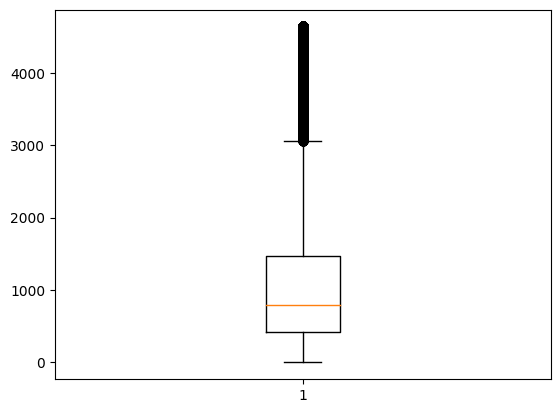

In [49]:
time_in_days = base_dados['time']

a = st.quantiles(time_in_days)[2]-st.quantiles(time_in_days)[0]
piso = st.quantiles(time_in_days)[0] - 3*a
teto = st.quantiles(time_in_days)[2] + 3*a
base_dados_sem_outliers_time = base_dados
base_dados_sem_outliers_time['time'] = base_dados['time'].clip(lower=piso, upper=teto)

plt.boxplot(base_dados_sem_outliers_time['time']);
print(st.mean(base_dados_sem_outliers_time['time']))

### Histograma

16.45265705323073
16
289.875


<function matplotlib.pyplot.show(close=None, block=None)>

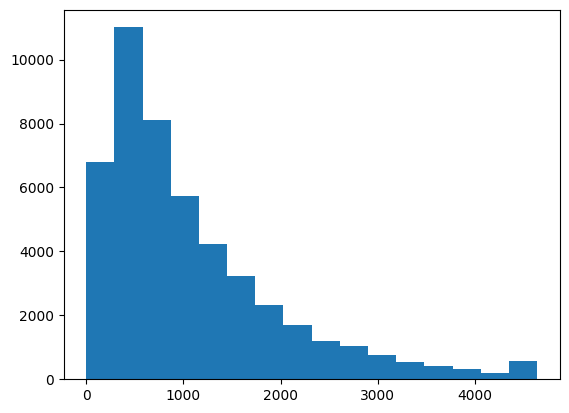

In [50]:
#k é o número de classes
#h é o histograma

time_in_days = base_dados_sem_outliers_time['time']

a = 1 + 3.3*m.log10(len(time_in_days))
k = round(a)
h = (max(time_in_days) - min(time_in_days))/k

print(a)
print(k)
print(h)

plt.hist(time_in_days, bins=k)
plt.show

In [65]:
#Simulação com tempo médio para transplante

def fila(env, recurso, paciente, chegada, saiuFila, prioridade, saida):
    yield env.timeout(chegada)

    with recurso.request(priority=prioridade) as req:
        yield req
        print("Paciente:", paciente, 'entrou na fila em', env.now)
        yield env.timeout(saida)
        if saiuFila:
            print("Paciente:", paciente, "saiu (morte ou desistência) da fila em", env.now)
        else:    
            print("Paciente:", paciente, 'foi transplantado em', env.now)

env = simpy.Environment()
recurso = simpy.PriorityResource(env, capacity=1) # substituir por 1355/12 == 113
for i in range(100):
    env.process(fila(env, recurso, idPaciente[i], dataChegada[i], transplanteOcorreu[i], prioridade[i], 30))

# print("------------------------------------")
# print("Transplantes realizado:", transplantes_com_sucesso)
# print("Total de desistência:", desistencias)

env.run()

Paciente: 1.0 entrou na fila em 1.0
Paciente: 1.0 saiu (morte ou desistência) da fila em 31.0
Paciente: 2.0 entrou na fila em 31.0
Paciente: 2.0 foi transplantado em 61.0
Paciente: 3.0 entrou na fila em 61.0
Paciente: 3.0 foi transplantado em 91.0
Paciente: 4.0 entrou na fila em 91.0
Paciente: 4.0 foi transplantado em 121.0
Paciente: 5.0 entrou na fila em 121.0
Paciente: 5.0 foi transplantado em 151.0
Paciente: 6.0 entrou na fila em 151.0
Paciente: 6.0 foi transplantado em 181.0
Paciente: 7.0 entrou na fila em 181.0
Paciente: 7.0 saiu (morte ou desistência) da fila em 211.0
Paciente: 8.0 entrou na fila em 211.0
Paciente: 8.0 saiu (morte ou desistência) da fila em 241.0
Paciente: 9.0 entrou na fila em 241.0
Paciente: 9.0 saiu (morte ou desistência) da fila em 271.0
Paciente: 10.0 entrou na fila em 271.0
Paciente: 10.0 foi transplantado em 301.0
Paciente: 11.0 entrou na fila em 301.0
Paciente: 11.0 foi transplantado em 331.0
Paciente: 12.0 entrou na fila em 331.0
Paciente: 12.0 foi trans